In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

import os
import sys
import inspect
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from dataset.dataset import get_test_datasets, get_validation_datasets, get_dataset_shapes
from experiment.model import get_scalar_conv_model3, get_vector_conv_model3, get_scalar_conv_model4, get_vector_conv_model4
from experiment.learning import validate_model, validate_model_multiple, test_model, test_model_multiple

In [2]:
dataset_name = 'fashion_mnist'
epochs = 10
num_tries = 30

train_dataset, test_dataset = get_test_datasets(dataset_name, feature_range=(0,1))  
    
dataset_shapes = get_dataset_shapes(dataset_name)
print(dataset_shapes)

([28, 28, 1], [10])


# ConvNets C-P-C, with subsampled input

### Scalar

Average elapsed training time: 229.36586 sec
Last measures: [0.054870154708623886, 0.059583909809589386, 0.05504215136170387, 0.07741352170705795, 0.045219022780656815, 0.06484478712081909, 0.05386674031615257, 0.052467525005340576, 0.05705485865473747, 0.047594789415597916, 0.07524952292442322, 0.058724720031023026, 0.05471046641469002, 0.07085656374692917, 0.06652643531560898, 0.05552724003791809, 0.06296558678150177, 0.0619303397834301, 0.07075610011816025, 0.064213827252388, 0.06022459641098976, 0.03751978278160095, 0.06385742127895355, 0.04778658226132393, 0.06176425889134407, 0.05151934176683426, 0.0627937838435173, 0.050435710698366165, 0.05485355108976364, 0.0690949559211731]
Loss history average: [0.07369747 0.06371384 0.06194359 0.06105375 0.06045431 0.05999667
 0.05962279 0.0591499  0.0588342  0.05857728]
Measure history average: [0.06580896 0.06290419 0.06179888 0.06112734 0.06064093 0.06025362
 0.05992725 0.05946142 0.05920223 0.05897561]
Measure history worst: [0.08061712

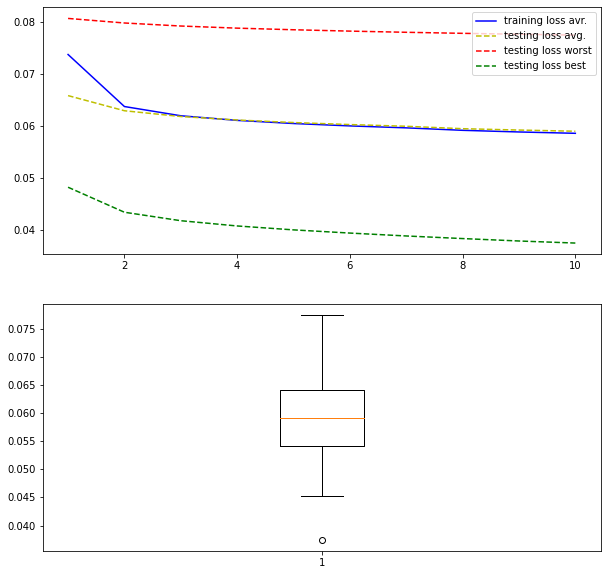

In [3]:
model_fun = lambda: get_scalar_conv_model3(dataset_shapes, optimizer=keras.optimizers.Adam())

test_model_multiple(model_fun, train_dataset, test_dataset, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_data=True)

### Vector

Average elapsed training time: 363.53369 sec
Last measures: [0.07339801639318466, 0.06377746909856796, 0.07031862437725067, 0.06355726718902588, 0.06805559992790222, 0.05415300279855728, 0.09000012278556824, 0.046091075986623764, 0.07107217609882355, 0.06977256387472153, 0.06374505907297134, 0.04813519865274429, 0.07184313237667084, 0.06267666816711426, 0.07134168595075607, 0.05497368797659874, 0.06433967500925064, 0.07275312393903732, 0.07790198177099228, 0.07102341949939728, 0.05009875074028969, 0.04193355515599251, 0.09000012278556824, 0.09000012278556824, 0.05746793746948242, 0.0744304358959198, 0.07648395746946335, 0.06875584274530411, 0.07452021539211273, 0.057157885283231735]
Loss history average: [0.08067308 0.07168281 0.07010814 0.06902198 0.06809888 0.06767363
 0.0673725  0.06712712 0.06686992 0.06665844]
Measure history average: [0.07330024 0.07097367 0.0698986  0.06872173 0.06818311 0.06786478
 0.06761454 0.06738835 0.06715392 0.06699261]
Measure history worst: [0.09000012 

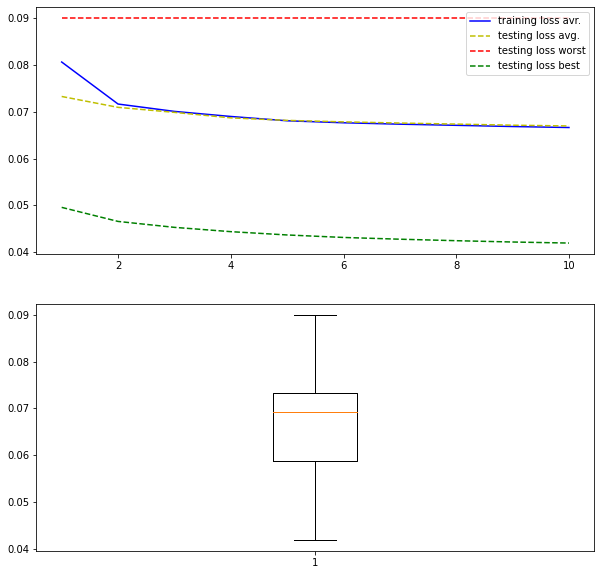

In [4]:
shared_inner_nets = False
model_fun = lambda: get_vector_conv_model3(dataset_shapes, shared_inner_nets, optimizer=keras.optimizers.Adam())

test_model_multiple(model_fun, train_dataset, test_dataset, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_data=True)

Average elapsed training time: 364.68288 sec
Last measures: [0.05384284630417824, 0.05157078802585602, 0.09000012278556824, 0.050568580627441406, 0.04097658023238182, 0.07553703337907791, 0.09000012278556824, 0.07269792258739471, 0.09000012278556824, 0.09000012278556824, 0.09000012278556824, 0.09000012278556824, 0.05675728619098663, 0.09000012278556824, 0.09000012278556824, 0.09000012278556824, 0.09000012278556824, 0.09000012278556824, 0.09000012278556824, 0.072271928191185, 0.061482787132263184, 0.09000012278556824, 0.09000012278556824, 0.05951002985239029, 0.09000012278556824, 0.09000012278556824, 0.0899999663233757, 0.06882667541503906, 0.09000006318092346, 0.06683044135570526]
Loss history average: [0.08421869 0.08042212 0.07969077 0.07935963 0.07901485 0.07882547
 0.07861939 0.07839905 0.07825944 0.07816988]
Measure history average: [0.08104145 0.08023425 0.07966332 0.07943519 0.07910576 0.07892066
 0.07876567 0.07853369 0.07843627 0.0783625 ]
Measure history worst: [0.09000012 0.

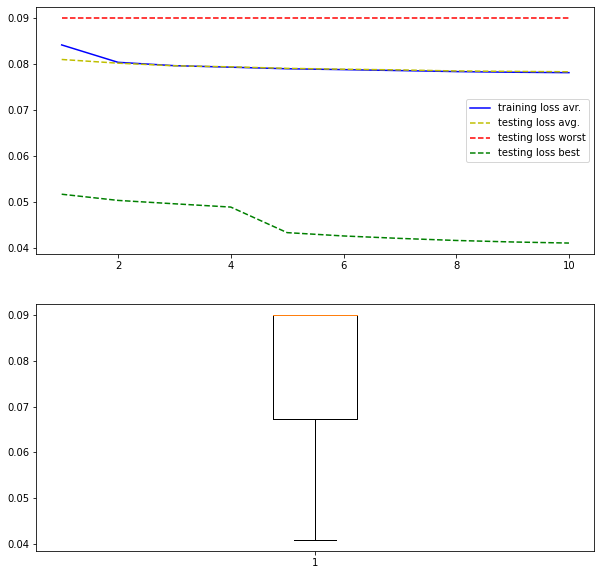

In [5]:
shared_inner_nets = True
model_fun = lambda: get_vector_conv_model3(dataset_shapes, shared_inner_nets, optimizer=keras.optimizers.Adam())

test_model_multiple(model_fun, train_dataset, test_dataset, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_data=True)

# ConvNets C-C-P, with subsampled input

### Scalar

Average elapsed training time: 250.68596 sec
Last measures: [0.07563149929046631, 0.06283997744321823, 0.05398961901664734, 0.042440831661224365, 0.06862833350896835, 0.04939287528395653, 0.058354396373033524, 0.06986727565526962, 0.059473082423210144, 0.05817117914557457, 0.06324005872011185, 0.043501872569322586, 0.0560050792992115, 0.04403923824429512, 0.04880226403474808, 0.045724689960479736, 0.054583970457315445, 0.05465637147426605, 0.0454675517976284, 0.054575398564338684, 0.06581790745258331, 0.06408698856830597, 0.05099731311202049, 0.06267303228378296, 0.04790989309549332, 0.05524713918566704, 0.0562698170542717, 0.04482065886259079, 0.05485667288303375, 0.04959893971681595]
Loss history average: [0.0720858  0.06215959 0.05994232 0.05852217 0.05774654 0.05712597
 0.05652569 0.05619049 0.05563413 0.05506119]
Measure history average: [0.06426592 0.0612525  0.0596852  0.05867067 0.05805917 0.05736814
 0.05701052 0.05672528 0.05607833 0.0553888 ]
Measure history worst: [0.079562

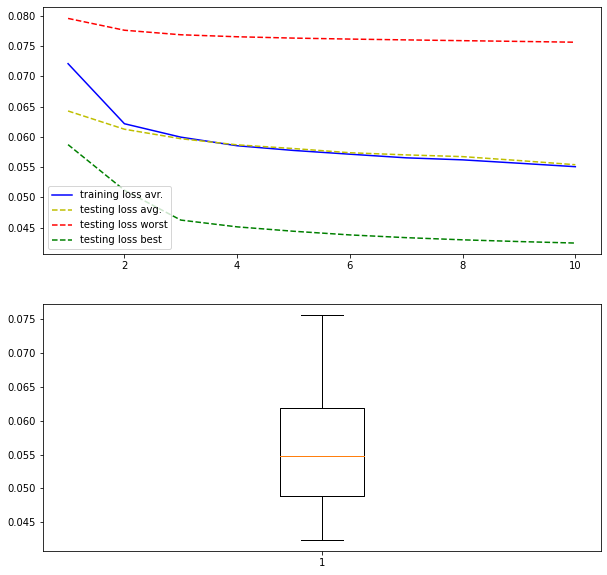

In [6]:
model_fun = lambda: get_scalar_conv_model4(dataset_shapes, optimizer=keras.optimizers.Adam())

test_model_multiple(model_fun, train_dataset, test_dataset, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_data=True)

### Vector

Average elapsed training time: 412.74880 sec
Last measures: [0.07613278180360794, 0.080317422747612, 0.08264985680580139, 0.07808782160282135, 0.07722476124763489, 0.07654070854187012, 0.07857181131839752, 0.07718533277511597, 0.09000012278556824, 0.0790531262755394, 0.07951009273529053, 0.07659889757633209, 0.07809939980506897, 0.0812637135386467, 0.07505566626787186, 0.0810622051358223, 0.08224411308765411, 0.07985163480043411, 0.07983385771512985, 0.07787128537893295, 0.07773540914058685, 0.07911210507154465, 0.07580304145812988, 0.08106246590614319, 0.07502953708171844, 0.08037371188402176, 0.07856912165880203, 0.0774490162730217, 0.0838557630777359, 0.07662767171859741]
Loss history average: [0.08579728 0.08094481 0.08019039 0.07981184 0.07953531 0.07935279
 0.07921456 0.07910728 0.07903434 0.07897426]
Measure history average: [0.08174187 0.08049075 0.08012704 0.07975845 0.07954962 0.07940093
 0.07929111 0.07920899 0.0791459  0.07909242]
Measure history worst: [0.09000012 0.090000

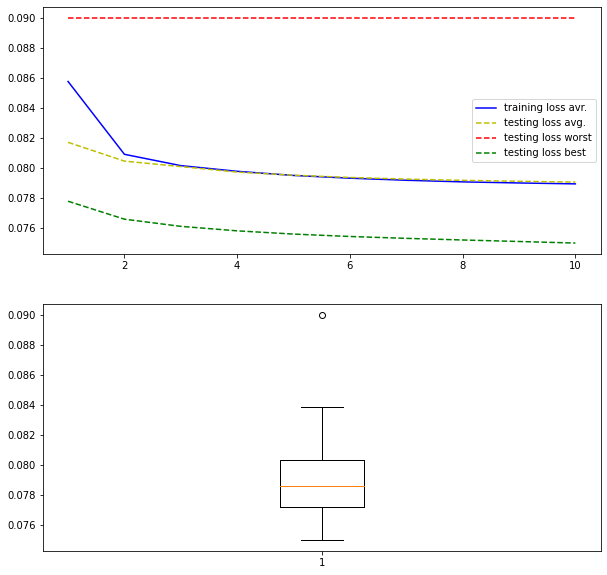

In [7]:
shared_inner_nets = False
model_fun = lambda: get_vector_conv_model4(dataset_shapes, shared_inner_nets, optimizer=keras.optimizers.Adam())

test_model_multiple(model_fun, train_dataset, test_dataset, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_data=True)

Average elapsed training time: 284.86831 sec
Last measures: [0.07837462425231934, 0.07868213206529617, 0.0765121579170227, 0.08072947710752487, 0.08033528923988342, 0.07766097784042358, 0.0869692713022232, 0.0816332995891571, 0.08050833642482758, 0.07682830095291138, 0.07870329916477203, 0.09000003337860107, 0.07696366310119629, 0.0743032842874527, 0.07897856831550598, 0.07654257863759995, 0.08040706068277359, 0.07728127390146255, 0.07850722968578339, 0.08028066158294678, 0.0786626785993576, 0.07931692898273468, 0.07695849239826202, 0.07601399719715118, 0.08035074919462204, 0.08005880564451218, 0.08156091719865799, 0.08015696704387665, 0.07764051109552383, 0.07769622653722763]
Loss history average: [0.08650431 0.08179674 0.08062253 0.08014855 0.07988047 0.07971944
 0.0795325  0.07938675 0.07927239 0.07920688]
Measure history average: [0.08280438 0.08121505 0.08038    0.08006885 0.07989089 0.0797448
 0.07957329 0.07941446 0.07934274 0.07928726]
Measure history worst: [0.0900001  0.09000

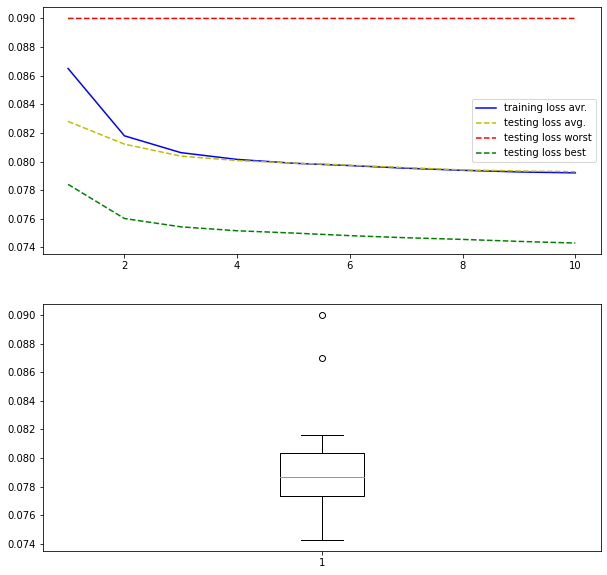

In [8]:
shared_inner_nets = True
model_fun = lambda: get_vector_conv_model4(dataset_shapes, shared_inner_nets, optimizer=keras.optimizers.Adam())

test_model_multiple(model_fun, train_dataset, test_dataset, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_data=True)